In [6]:
import math
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

**Задание 2.**

Параметры модели

In [7]:
D = 1
alpha = 1
N = [10, 25, 50, 75, 100, 150, 200, 250, 300, 350]
H = [2, 5, 7]

Заданная ковариационная функция R(t).

In [8]:
def R(t):
    return D * math.exp(- alpha * abs(t))
def Cum(t):
    return (R(0)-R(t))

Моделирование десяти наборов наблюдений.

In [9]:
def gen_x(n):
    np.random.seed(2023)
    
    x = np.random.normal(0, 1, n)
    a0 = math.sqrt(D * (1 - math.exp(- 2 * alpha)))
    b1 = math.exp(- alpha)

    res = [0.] * n
    res[0] = a0 * x[0]
    for j in range(1, n):
        res[j] = a0 * x[j] + b1 * res[j - 1]
    

    return res

def gen_X(N):
    count = len(N)
    X = [0.]*count
    for i in range(count):
        X[i] = [.0]*N[i]

    for i in range(count):
        X[i] = gen_x(N[i])
    
    return X

X = gen_X(N)

def gen_D_classic(X, H):
    D_classic = [.0] * len(H)

    for i in range(len(H)):
        D_classic[i] = [.0] * len(X)

    for i in range(len(H)):
        h = H[i]

        for j in range(len(X)):
            D_classic[i][j] = 0

            for s in range(1, len(X[j]) - h + 1):
                for t in range(1, len(X[j]) - h + 1):
                    D_classic[i][j] += math.pow(Cum(s - t + h) + Cum(s - t - h) - (2 * Cum(s - t)), 2)

            D_classic[i][j] /= 2 * math.pow(len(X[j]) - h, 2)

    return D_classic

def gen_D_robust(X, H):
    D_robust = [.0] * len(H)

    for i in range(len(H)):
        D_robust[i] = [.0] * len(X)

    for i in range(len(H)):
        h = H[i]

        for j in range(len(X)):
            D_robust[i][j] = 0

            for s in range(1, len(X[j]) - h + 1):
                for t in range(1, len(X[j]) - h + 1):
                    D_robust[i][j] += math.pow(Cum(s - t + h) + Cum(s - t - h) - (2 * Cum(s - t)), 2)

            D_robust[i][j] *= 10 / math.pow(len(X[j]) - h, 2)
            D_robust[i][j] /= math.pow(0.457 + (0.494 / (len(X[j]) - h)) + (0.045 / math.pow(len(X[j]) - h, 2)), 2)
            D_robust[i][j] *= (1 / math.sqrt(math.pi)) - (math.pow(math.gamma(3 / 4), 2) / math.pi)
            D_robust[i][j] *= math.pow(math.gamma(3 / 4), 6) / math.pow(math.pi, 3)


    return D_robust

Графики зависимости дисперсии от количества наблюдений для классической оценки

0.25700300335671167 0.09469228705451622 0.04607881956727525 0.030444545076780724 0.02273139953616467 0.015086702063899258 0.011289814377868947 0.009019781538311447 0.007509790151284375 0.006432868984154182 
0.4867187016037212 0.17133464977425159 0.08038057129956966 0.05245050078643952 0.03891903056238037 0.02567028988201401 0.019150333693970328 0.015271387466174072 0.01269909366964627 0.010868407650030002 
0.7925637195597894 0.1868840372839431 0.08559780536913224 0.05536121457074067 0.04089607702886849 0.026854613835289722 0.019989525260086894 0.01591948474162326 0.013226356540009396 0.011312542483985768 
[[0.25700300335671167, 0.09469228705451622, 0.04607881956727525, 0.030444545076780724, 0.02273139953616467, 0.015086702063899258, 0.011289814377868947, 0.009019781538311447, 0.007509790151284375, 0.006432868984154182], [0.4867187016037212, 0.17133464977425159, 0.08038057129956966, 0.05245050078643952, 0.03891903056238037, 0.02567028988201401, 0.019150333693970328, 0.015271387466174072

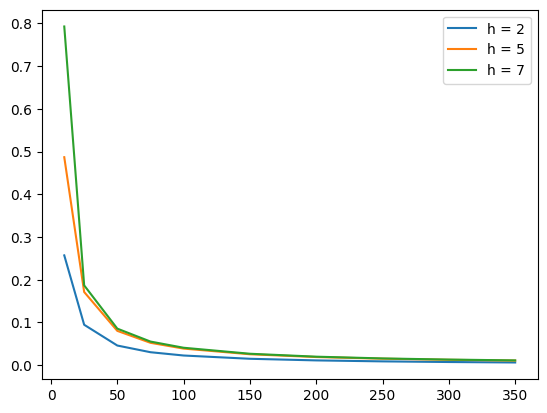

In [10]:
D_classic = gen_D_classic(X, H)

for i in range(len(H)):
    for j in range(len(X)):
        print(D_classic[i][j], end = " ")

    print("")

h = [.0] * len(X)
for i in range(len(X)):
    h[i] = len(X[i])

for i in range(len(H)):
    plt.plot(h, D_classic[i], label = 'h = '+str(H[i]))
    plt.legend()
plt.show()